In [20]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# root_path = "../../data/calibration_rotation/extracted/visible"
root_path = "../../../honours_project_data//animals/images_downsampled/cat/cat_single_2/lwir"

images = sorted(os.listdir(root_path))

In [33]:
def show(img):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(img)
    
def load(i):
    return cv2.imread(os.path.join(root_path, images[i]))

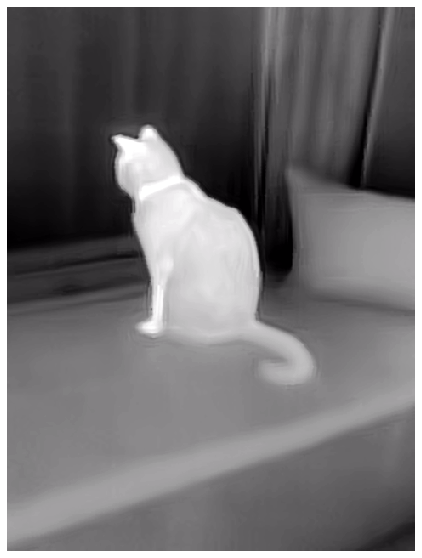

In [34]:
img = load(20)
show(img)

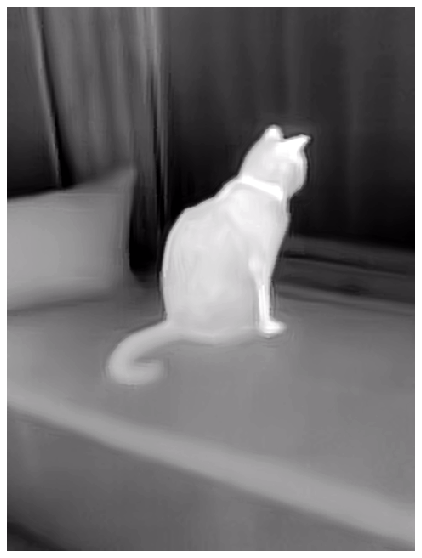

In [35]:
def hflip(img):
    return cv2.flip(img, 1)
show(hflip(img))

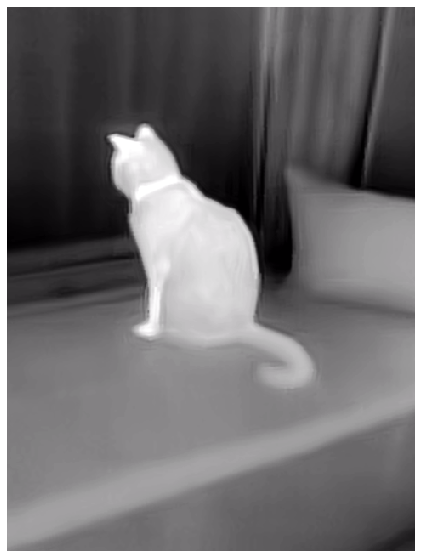

In [36]:
def crop(img, max_zoom=0.5):
    shape = img.shape

    zoom = np.random.uniform(0, max_zoom)
    width = int((1-zoom) * shape[0])
    height = int((1-zoom) * shape[1])

    left = np.random.randint(0, shape[0] - width)
    right = left + width

    start = np.random.randint(0, shape[1] - height)
    end = start + height

    img = img[left:right, start:end]
    img = cv2.resize(img, shape[:2][::-1]) / 255
    return img

show(crop(img))

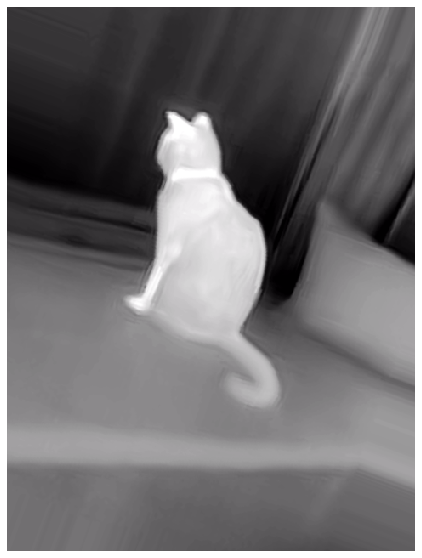

In [40]:
datagen = ImageDataGenerator()

params = {
    "theta": 20,
#     "flip_horizontal": True,
#     "zx": 0.6,
#     "zy": 0.6,
}

img_tr = datagen.apply_transform(img, params)
# show(img)
show(img_tr)